## Loss Vs Epochs

In [16]:
import torch
import matplotlib.pyplot as plt

checkpoint_paths = [
    '/Users/oogway/CSE Courses/ML/Assingment-3/app/linux_cw3.pth',
    '/Users/oogway/CSE Courses/ML/Assingment-3/app/linux_cw5.pth',
    '/Users/oogway/CSE Courses/ML/Assingment-3/app/shakespeare_cw3.pth',
    '/Users/oogway/CSE Courses/ML/Assingment-3/app/shakespeare_cw5.pth',
]

model_names = [
    'linux context window 3',
    'linux context window 5',
    'shakespeare context window 3',
    'shakespeare context window 5',
]


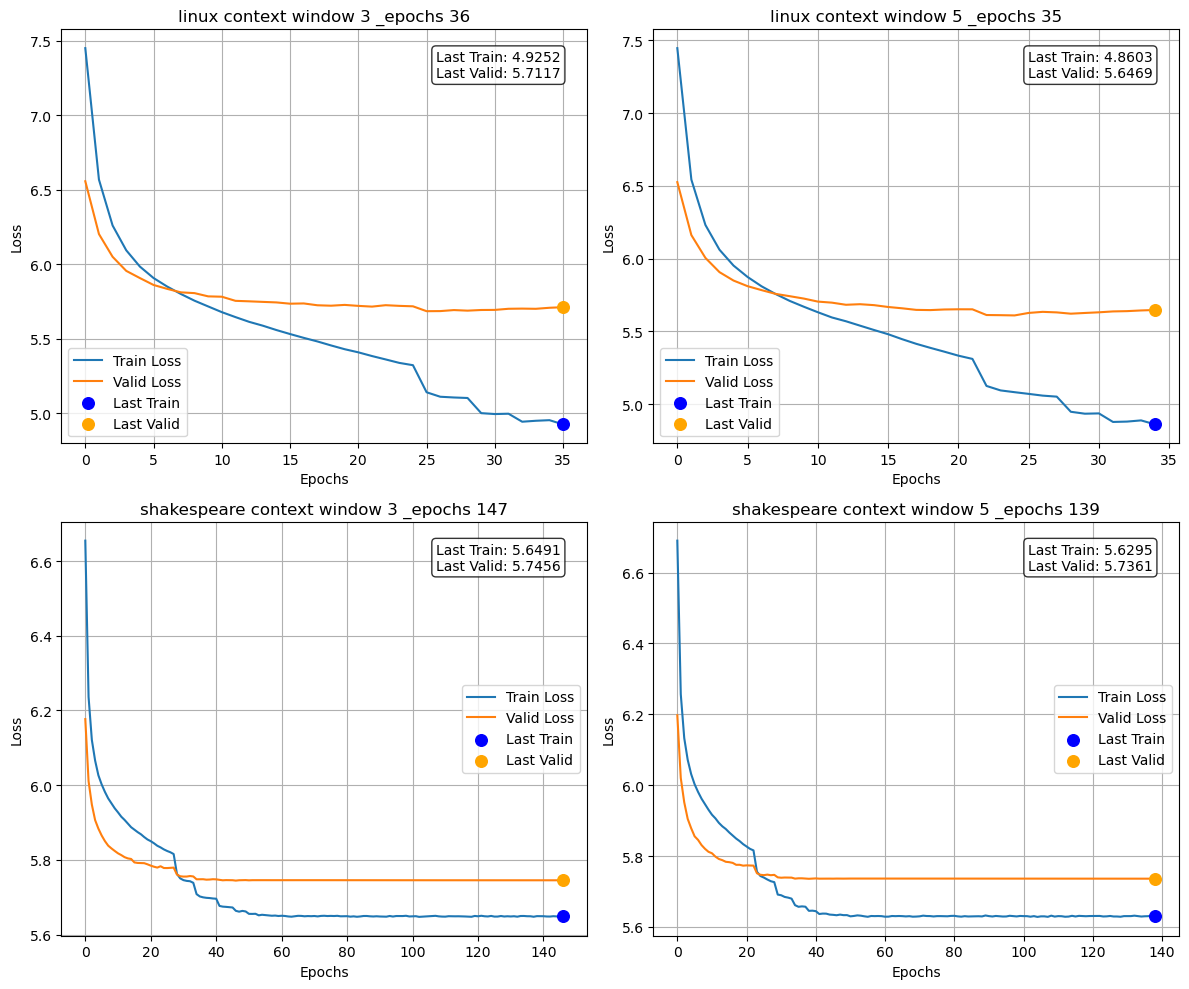

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (path, ax, name) in enumerate(zip(checkpoint_paths, axes, model_names), 1):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    train_losses = checkpoint['train_losses']
    valid_losses = checkpoint['valid_losses']
    
    ax.plot(train_losses, label='Train Loss')
    ax.plot(valid_losses, label='Valid Loss')
    

    last_epoch = len(train_losses) - 1
    last_train = train_losses[-1]
    last_valid = valid_losses[-1]
    ax.scatter(last_epoch, last_train, color='blue', s=70, zorder=5, marker='o', label='Last Train')
    ax.scatter(last_epoch, last_valid, color='orange', s=70, zorder=5, marker='o', label='Last Valid')
    

    ax.text(0.95, 0.95, 
            f'Last Train: {last_train:.4f}\nLast Valid: {last_valid:.4f}', 
            transform=ax.transAxes, 
            fontsize=10, 
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'{name} _epochs {len(train_losses)}')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()
